In [1]:
import pandas as pd #dataframe
import numpy as np #numeric calculations
import os   #due to files 
import matplotlib.pyplot as plt #visualization
import seaborn as sns #delight visualization
from nltk.corpus import stopwords #stopwords for step 3 of cleaning texts
from nltk.corpus import opinion_lexicon
import random #it's usd is evident
sns.set()
random.seed(1)

In [2]:
#fetching offline data from stock_price.csv file
df = pd.read_csv('data/stock_prices.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [3]:
#calculate return for each one of the tickers
df['returns'] = df.groupby('ticker')['price'].pct_change(1)
#exprot csv file
#df.to_csv('data/stock_prices_return.csv')

In [4]:
#data exploring
#df[df['ticker']=='CNP']
#df.groupby('ticker')['returns'].max()
#df[df['ticker']=='ADBE']['returns'].plot(figsize=(12, 8),
#                                         color='#39b8eb',
#                                          title="Returns of ADOBE")

In [5]:
#MDA files cleaning and exploring
#get a list of mda files existed in the data folder
MDA_FILES = os.listdir('data/mda/')
#drop garbage data
MDA_FILES = [file for file in MDA_FILES if file != '.DS_Store']
#1001082_MDA_2005-03-16.txt : file convention
df_mda= pd.DataFrame(MDA_FILES)
df_mda.columns=['file_name']
df_mda

,file_name
0,1001082_MDA_2005-03-16.txt
1,1001082_MDA_2006-03-15.txt
2,1001082_MDA_2007-03-01.txt
3,1001082_MDA_2008-02-26.txt
4,1001082_MDA_2009-03-02.txt
...,...
1359,98246_MDA_2015-03-20.txt
1360,98246_MDA_2016-03-28.txt
1361,98246_MDA_2017-03-17.txt
1362,98246_MDA_2018-03-16.txt


In [6]:
#extrating data from file name convention
df_mda['cik'] = df_mda['file_name'].apply(lambda x: x.split('_')[0])
df_mda['filing_date'] = df_mda['file_name'].apply(lambda x: x.split('_')[2].split('.')[0])
#checkign type of filing_date
print(type(df_mda['filing_date']))
#parse date to Timestamp
df_mda['filing_date']=pd.to_datetime(df_mda['filing_date'] , format='%Y-%m-%d')

<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='filing_date'>

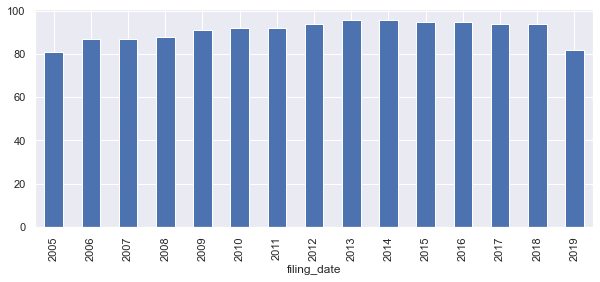

In [7]:
#data_exploring
#plot number of filing per year
df_mda.groupby(df_mda['filing_date'].dt.year)['cik'].count().plot(kind='bar' , figsize=(10,4))

In [8]:
#Cleaning text data
random_file_index = random.randint(1 , len(MDA_FILES))
#print(random_file_index)
mda_random = MDA_FILES[random_file_index]

In [9]:
#open randmoly chosen file
with open(f"data/mda/{MDA_FILES[11]}") as file:
    mda_random_text = file.read()
#extract the words
mda_raw_words = mda_random_text.split()
len(mda_raw_words)

16895

In [12]:
#implementing 3 step to clean the text content
#step 1:erradicating all of the symbols,numbers & etc
mda_alphabetic_words = [word for word in mda_raw_words if word.isalpha()]
#step 2:harmonizing the alphabetic_words(i.e. converting every letters to lower case letters)
mda_hm_words = [word.lower() for word in mda_alphabetic_words]
#step 3:removing stopwords from the data set
stopwords_nltk = set(stopwords.words('english'))
mda_cleaned_words = [word for word in mda_hm_words if word not in stopwords_nltk]
mda_cleaned_words

['company',
 'dish',
 'network',
 'corp',
 'filing',
 'item',
 'management',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operation',
 'read',
 'following',
 'management',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operations',
 'together',
 'audited',
 'consolidated',
 'financial',
 'statements',
 'notes',
 'financial',
 'statements',
 'included',
 'elsewhere',
 'nnual',
 'r',
 'eport',
 'form',
 'management',
 'discussion',
 'analysis',
 'intended',
 'help',
 'provide',
 'understanding',
 'financial',
 'changes',
 'financial',
 'condition',
 'results',
 'operations',
 'contains',
 'statements',
 'involve',
 'risks',
 'statements',
 'historical',
 'rather',
 'based',
 'current',
 'assumptions',
 'projections',
 'business',
 'future',
 'financial',
 'actual',
 'results',
 'could',
 'differ',
 'materially',
 'results',
 'contemplated',
 'statements',
 'due',
 'number',
 'including',
 'discussed',
 'caption',
 'item',
 'risk',
 'factors

In [15]:
deleted_words = len(mda_raw_words) - len(mda_cleaned_words)
print(deleted_words)

9507


In [32]:
#create function of cleaning text
def clean_text(mda_file):
    #open mda_file
    with open(mda_file) as file:
        mda_text = file.read()
    #split words
    mda_raw_words = mda_text.split()
    #step 1
    mda_alphabetic_words = [word for word in mda_raw_words if word.isalpha()]
    #step 2
    mda_hm_words = [word.lower() for word in mda_alphabetic_words]
    #step 3
    stopwords_nltk = set(stopwords.words('english'))
    mda_cleaned_words = [word for word in mda_hm_words if word not in stopwords_nltk]
    return mda_cleaned_words

In [33]:
#testing the function
clean_text(f"data/mda/{MDA_FILES[random.randint(1,len(MDA_FILES))]}");

In [34]:
#implementing sentiment lexicon
positive_lexicon = set(opinion_lexicon.positive())
negative_lexicon = set(opinion_lexicon.negative())

In [35]:
#estimatin sentiment
positive_sentiment_count = 0
negative_sentiment_count = 0
for word in clean_text(f"data/mda/{MDA_FILES[random.randint(1,len(MDA_FILES))]}"):
    if word in positive_lexicon:
        positive_sentiment_count += 1 
    elif word in negative_lexicon:
        negative_sentiment_count += 1

In [36]:
print(positive_sentiment_count)
print(negative_sentiment_count)

391
537


In [38]:
#calculation of sentiment using proportional approach
phi_positive = positive_sentiment_count/len(positive_lexicon)
phi_negative = negative_sentiment_count/len(negative_lexicon)
#net positive tone = ϕ_NPT
phi_net = (phi_positive - phi_negative)/(phi_positive + phi_negative)

0.19491525423728814 0.11227263223918044 0.2690295602018746


In [39]:
#estimating net postitive tone for all the firms
sentiment_values = {}
for file in MDA_FILES:
    cleaned_words = clean_text(f"data/mda/{file}")
    positive_sentiment_count = 0
    negative_sentiment_count = 0
    if len(cleaned_words)>=100:
        for word in cleaned_words:
            if word in positive_lexicon:
                positive_sentiment_count += 1 
            elif word in negative_lexicon:
                negative_sentiment_count += 1
        phi_positive = positive_sentiment_count/len(positive_lexicon)
        phi_negative = negative_sentiment_count/len(negative_lexicon)
        phi_net = (phi_positive - phi_negative)/(phi_positive + phi_negative)
        sentiment_values[file]=[phi_positive , phi_negative , phi_net , len(cleaned_words)]

In [41]:
#put all the datas into a dataframe
df_sentiment_status = pd.DataFrame(sentiment_values).T
df_sentiment_status.reset_index(inplace=True)
df_sentiment_status.columns = ['file name' , 'phi_positive' , 'phi_negative' , 'phi_net' , 'No cleaned words']
df_sentiment_status

,file name,phi_positive,phi_negative,phi_net,No cleaned words
0,1001082_MDA_2005-03-16.txt,0.017946,0.006899,0.444615,798.0
1,1001082_MDA_2006-03-15.txt,0.028913,0.009826,0.492693,1037.0
2,1001082_MDA_2007-03-01.txt,0.005484,0.000627,0.794716,314.0
3,1001082_MDA_2008-02-26.txt,0.022433,0.008781,0.437358,766.0
4,1001082_MDA_2009-03-02.txt,0.011964,0.003972,0.501471,437.0
...,...,...,...,...,...
1112,98246_MDA_2015-03-20.txt,0.093719,0.016099,0.706810,4367.0
1113,98246_MDA_2016-03-28.txt,0.098205,0.018817,0.678409,5146.0
1114,98246_MDA_2017-03-17.txt,0.113659,0.019653,0.705159,5363.0
1115,98246_MDA_2018-03-16.txt,0.117647,0.016935,0.748332,5465.0


In [43]:
#export csv file from database
df_sentiment_status['cik']=df_mda['file_name'].apply(lambda x: x.split('_')[0])
df_sentiment_status['filing_date']=df_mda['file_name'].apply(lambda x: x.split('_')[2].split('.')[0])
df_sentiment_status['filing_date']=pd.to_datetime(df_sentiment_status['filing_date'] , format='%Y-%m-%d')
#df_sentiment_status.to_csv('data/sentiment_scores.csv')

In [44]:
df_sentiment_status

,file name,phi_positive,phi_negative,phi_net,No cleaned words,cik,filing_date
0,1001082_MDA_2005-03-16.txt,0.017946,0.006899,0.444615,798.0,1001082,2005-03-16
1,1001082_MDA_2006-03-15.txt,0.028913,0.009826,0.492693,1037.0,1001082,2006-03-15
2,1001082_MDA_2007-03-01.txt,0.005484,0.000627,0.794716,314.0,1001082,2007-03-01
3,1001082_MDA_2008-02-26.txt,0.022433,0.008781,0.437358,766.0,1001082,2008-02-26
4,1001082_MDA_2009-03-02.txt,0.011964,0.003972,0.501471,437.0,1001082,2009-03-02
...,...,...,...,...,...,...,...
1112,98246_MDA_2015-03-20.txt,0.093719,0.016099,0.706810,4367.0,87347,2015-01-29
1113,98246_MDA_2016-03-28.txt,0.098205,0.018817,0.678409,5146.0,87347,2016-01-27
1114,98246_MDA_2017-03-17.txt,0.113659,0.019653,0.705159,5363.0,87347,2017-01-25
1115,98246_MDA_2018-03-16.txt,0.117647,0.016935,0.748332,5465.0,87347,2018-01-24
